Matching method to solve harmonic oscillator problem of time-independent Schroedinger equation

Reference: **Computational Physics, second edition**   
by Nicholas J. Giordano, Hisao Nakanishi     
Chapter 10.2 One dimension: shooting and matching methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def potential(x,omega0=1):
    return omega0*omega0*x*x/2

In [46]:
def generate_x_grid(n=0,dx=0.1,omega0=1):
    # n=0,1,2, : energy levels
    x0 = 1/np.sqrt(omega0)
    xmax = 10 * x0
    x = np.arange(-xmax, xmax+dx, dx)  
    return x

In [47]:
def initialize_psi(N):
    # intialize wave function
    psi = np.zeros(N)
    psi[1] = 1e-3  # integration from left to right
    psi[N-2] = 1e-3 # integration from right to left
    
    return psi

In [64]:
def oscillator_matching(n=0,E=0, omega0=1,dx=0.1, dE=0.1):
    # energy level n=0,1,2...
    # initial guess of energy E, increment dE
    # wavefunction with define parity
    # half width of square well L
    # step size of x grid dx
    # cutoff parameter b, we need to adjust it to handle other potentials
    
    x = generate_x_grid(n,dx,omega0);
    N = len(x)

    psi = initialize_psi(N);    

   
    tol = 0.5e-6   # stopping criterion, if wavefunction converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx2 = dx * dx
    
    matching_index = np.argmin(potential(x,omega0))
    # print(matching_index)
    
    while True:
        # integration from left to right
        for i in range(2,matching_index+1):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1],omega0)) * psi[i-1] * dx2
                 
        psi_left = psi[matching_index]   
        
        for i in range(N-3,matching_index-1,-1):
            psi[i] = 2*psi[i+1] - psi[i+2] - 2 * (E - potential(x[i+1],omega0)) * psi[i+1] * dx2
            
               
        if abs(dE) < tol:
            break        
                    
        psi_right = psi[matching_index] 
        psi[matching_index::] = psi[matching_index::] * psi_left / psi_right # wave function continues
        # three-point forward difference formula
        deri_psi_right = -3*psi[matching_index] + 4*psi[matching_index+1] - psi[matching_index+2] 
        # three-point backward difference formula
        deri_psi_left = 3*psi[matching_index] - 4*psi[matching_index-1] + psi[matching_index-2]

        dif = abs(deri_psi_right) - abs(deri_psi_left)
        if  dif * last_diverge < 0:
            dE = -dE / 2
        last_diverge = np.sign(dif)
        E = E + dE
        
    psi = psi / np.sqrt(np.sum(psi * psi)) # normalisation
    
    return E,x,psi

In [65]:
def oscillator_matching_app(omega0=1,dx=0.1):
    
    # plot the lowest four states
    
    # initialize plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline()
    
    # initialize first guess
    E_init = 0.1
    DeltaE = 0.05
    
    for n in range(0,5):
        
        E,x,psi = oscillator_matching(n,E_init,omega0,dx)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
                
        E_init = E + DeltaE
    
    plt.legend()
    plt.title('Oscillator $\omega = {:}$'.format(omega0))

E = 0.500, normalizatoin = 1.00000
E = 1.500, normalizatoin = 1.00000
E = 2.500, normalizatoin = 1.00000
E = 3.500, normalizatoin = 1.00000
E = 4.500, normalizatoin = 1.00000


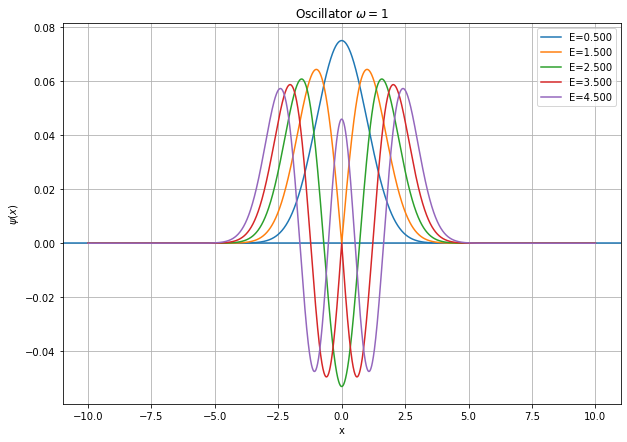

In [67]:
if __name__ == '__main__':
    oscillator_matching_app(omega0=1,dx=0.01)